# Fantasy 2016 ESPN Rankings

This notebook analyzes the trends in ESPN 2016 preseason rankings to determine if there are any steals on the draft board. I will analyze the trends for all scoring offensive players and determine which players are worth their draft position. 

I will only evaluate players in the **top 300** of the ESPN rankings as these are the only players that actually matter while drafting. 

In [2]:
%matplotlib inline
# Libraries

from pandas import read_csv, value_counts
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#read in data
file = "../../data/formatted_data/2016espnprojstats.csv"
raw_data = read_csv(file, na_values = ["","--"])

#only take the top 300
data = raw_data.ix[:300,:]

#Create array of last names
last_names = data["Name"].copy()
for index,name in last_names.iteritems():
    result = name
    if name.find("D/ST") < 0:
        arr = name.split(" ")[1:]
        result = " ".join(arr)
    last_names.set_value(index, result)

#show relative values for each column
data.drop("Rank",1).describe()

,RUSH,RUSHYDS,RUSHTD,REC,RECYDS,RECTD,C,A,PASSYDS,PASSTD,INT,PTS
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,44.144518,189.960465,1.253821,32.844518,383.501329,2.394684,34.430897,55.256811,399.580731,2.566113,1.349502,117.069435
std,73.908857,323.940732,2.138978,29.431188,387.035230,2.597211,102.388781,163.818511,1186.843025,7.745892,4.064945,66.392095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,1.900000,14.500000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,68.600000
50%,2.300000,14.200000,0.100000,32.000000,274.300000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,110.300000
75%,59.500000,258.300000,1.700000,52.200000,629.100000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,144.200000
max,307.000000,1454.900000,10.700000,131.700000,1758.600000,10.100000,438.900000,655.500000,4767.200000,32.600000,18.800000,335.300000


In [9]:
# Counts at each position
position_group = data.groupby('Position')
position_group.mean()#.size()

,Rank,RUSH,RUSHYDS,RUSHTD,REC,RECYDS,RECTD,C,A,PASSYDS,PASSTD,INT,PTS
Position,,,,,,,,,,,,,
D/ST,206.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.00000,105.854545
K,198.368421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.00000,131.163158
QB,163.406250,46.762500,194.012500,1.575000,0.000000,0.000000,0.000000,323.865625,519.759375,3758.55625,24.1375,12.69375,244.121875
RB,134.538462,127.260440,545.800000,3.528571,25.048352,200.996703,0.892308,0.000000,0.000000,0.00000,0.0000,0.00000,98.562637
TE,178.529412,0.000000,0.000000,0.000000,52.967647,602.455882,4.717647,0.000000,0.000000,0.00000,0.0000,0.00000,87.867647
WR,131.922330,2.042718,12.639806,0.057282,56.367961,744.268932,4.652427,0.000000,0.000000,0.00000,0.0000,0.00000,103.382524


In [10]:
#Create color mappings array so that each position has a different color
colors = {"RB": "red",
          "WR": "blue",
          "QB": "green",
          "TE": "black",
          "K": "yellow",
          "D/ST": "violet"}

pos = data["Position"].tolist()
for index, item in enumerate(pos):
    pos[index] = colors[item]

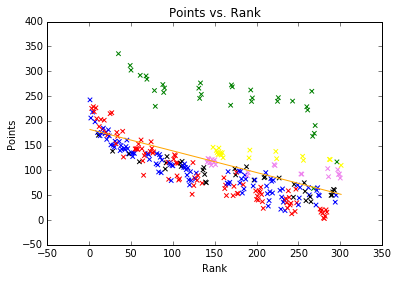

In [21]:
fig = plt.figure()
ax = fig.add_subplot("111")

ax.set_title("Points vs. Rank")
ax.set_ylabel("Points")
ax.set_xlabel("Rank")

ax.scatter(data["Rank"], data["PTS"], marker = "x", c = pos)

ax.plot(data["Rank"], np.poly1d(np.polyfit(data["Rank"], data["PTS"], 1))(data["Rank"]), c = "orange")

plt.show()

In [29]:
# Filter QB's
qb_data = data[data["Position"] == "QB"]

qb_data = qb_data.drop(["Position", "REC", "RECYDS", "RECTD"], 1)

#qb averages 
qb_data.describe()

,Rank,RUSH,RUSHYDS,RUSHTD,C,A,PASSYDS,PASSTD,INT,PTS
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,163.406250,46.762500,194.012500,1.575000,323.865625,519.759375,3758.556250,24.137500,12.693750,244.121875
std,83.072009,26.063592,167.788843,1.111523,68.491599,102.423126,774.225112,6.569517,3.355779,54.121594
min,35.000000,20.800000,21.900000,0.400000,80.100000,139.500000,924.000000,4.800000,2.900000,63.600000
25%,85.750000,27.275000,65.175000,0.900000,302.450000,484.200000,3525.675000,21.025000,10.475000,230.850000
50%,169.500000,38.800000,135.150000,1.450000,324.300000,539.300000,3830.350000,25.450000,13.500000,255.250000
75%,247.250000,59.350000,259.850000,1.750000,362.000000,592.775000,4240.150000,28.925000,15.325000,272.500000
max,296.000000,125.600000,682.300000,5.700000,438.900000,655.500000,4767.200000,32.600000,18.800000,335.300000


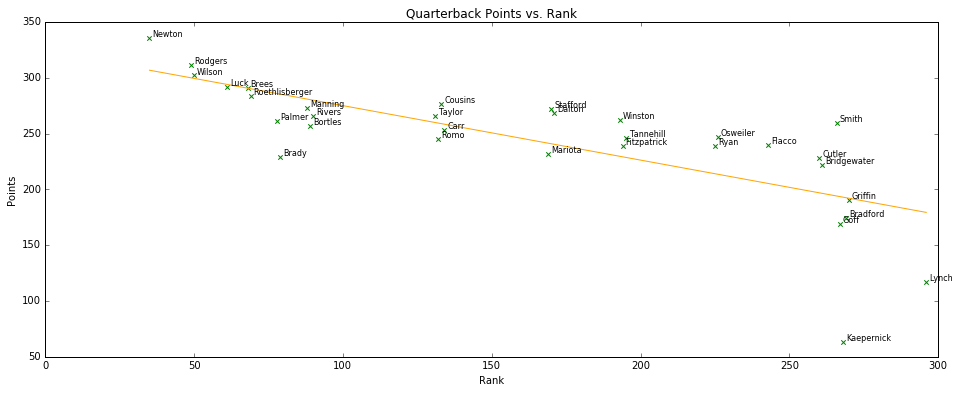

In [67]:
# qb graph
qb_fig = plt.figure(figsize=(16, 6))
qb_ax = qb_fig.add_subplot("111")

qb_ax.set_title("Quarterback Points vs. Rank")
qb_ax.set_ylabel("Points")
qb_ax.set_xlabel("Rank")
qb_ax.set_xlim(0,300)

qb_ax.scatter(qb_data["Rank"], qb_data["PTS"], marker = "x", c = colors["QB"])

qb_ax.plot(qb_data["Rank"], np.poly1d(np.polyfit(qb_data["Rank"], qb_data["PTS"], 1))(qb_data["Rank"]), c = "orange")

for index, name in enumerate(qb_data["Name"]):
    #data point
    rank = qb_data["Rank"].iloc[index]
    pts = qb_data["PTS"].iloc[index]
    
    #get last name of player
    name = last_names[rank-1]
    
    #add label to the data point
    qb_ax.text(rank+1,pts+1, name, fontsize=8)

plt.show()

In [42]:
# Filter RB's
rb_data = data[data["Position"] == "RB"]

rb_data = rb_data.drop(["Position", "C", "A", "PASSTD"], 1)

#rb averages 
rb_data.describe()

,Rank,RUSH,RUSHYDS,RUSHTD,REC,RECYDS,RECTD,PASSYDS,INT,PTS
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.0,91.000000
mean,134.538462,127.260440,545.800000,3.528571,25.048352,200.996703,0.892308,0.0,0.0,98.562637
std,88.327460,85.525246,381.157543,2.566852,18.456823,156.476278,0.774486,0.0,0.0,63.283499
min,3.000000,2.900000,11.400000,0.100000,1.800000,13.300000,0.100000,0.0,0.0,3.000000
25%,60.500000,59.350000,246.300000,1.500000,8.100000,59.850000,0.300000,0.0,0.0,48.600000
50%,124.000000,95.800000,408.400000,2.700000,21.400000,170.100000,0.800000,0.0,0.0,85.000000
75%,205.500000,205.000000,900.000000,5.450000,35.850000,277.250000,1.300000,0.0,0.0,143.500000
max,284.000000,307.000000,1454.900000,10.700000,74.100000,654.100000,4.000000,0.0,0.0,228.500000


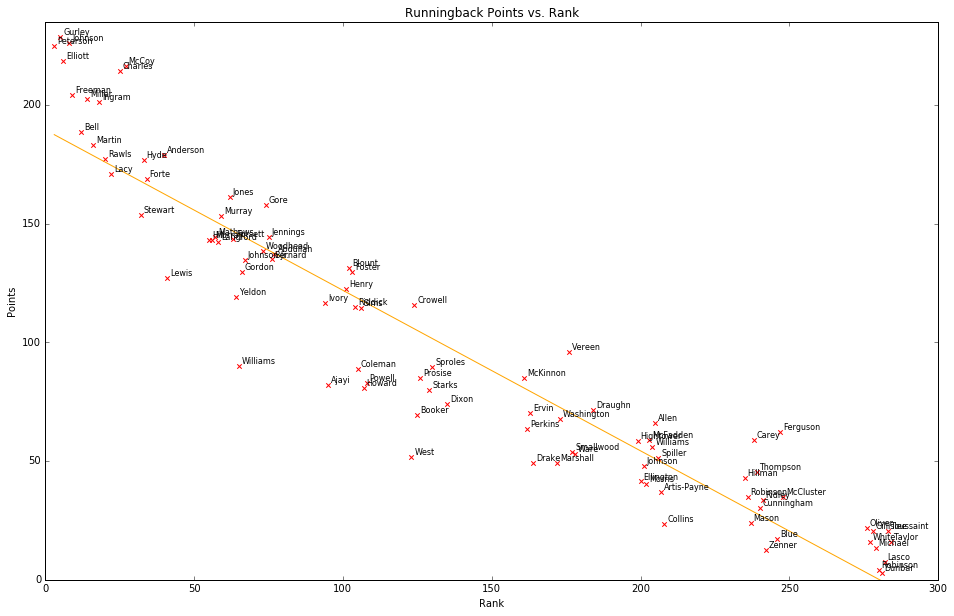

In [65]:
# rb graph
rb_fig = plt.figure(figsize=(16, 10))
rb_ax = rb_fig.add_subplot("111")

rb_ax.set_title("Runningback Points vs. Rank")
rb_ax.set_ylabel("Points")
rb_ax.set_xlabel("Rank")
rb_ax.set_xlim(0,300)
rb_ax.set_ylim(0,235)

rb_ax.scatter(rb_data["Rank"], rb_data["PTS"], marker = "x", c = colors["RB"])

rb_ax.plot(rb_data["Rank"], np.poly1d(np.polyfit(rb_data["Rank"], rb_data["PTS"], 1))(rb_data["Rank"]), c = "orange")

for index, name in enumerate(rb_data["Name"]):
    #data point
    rank = rb_data["Rank"].iloc[index]
    pts = rb_data["PTS"].iloc[index]
    
    #get last name of player
    name = last_names[rank-1]
    
    #add label to the data point
    rb_ax.text(rank+1,pts+1, name, fontsize=8)

plt.show()

In [45]:
# Filter WR's
wr_data = data[data["Position"] == "WR"]

wr_data = wr_data.drop(["Position", "C", "A", "PASSTD"], 1)

#rb averages 
wr_data.describe()

,Rank,RUSH,RUSHYDS,RUSHTD,REC,RECYDS,RECTD,PASSYDS,INT,PTS
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0,103.0,103.000000
mean,131.922330,2.042718,12.639806,0.057282,56.367961,744.268932,4.652427,0.0,0.0,103.382524
std,87.077123,4.184603,25.276317,0.130310,25.145764,347.581022,2.286441,0.0,0.0,47.471185
min,1.000000,0.000000,0.000000,0.000000,9.800000,133.700000,0.800000,0.0,0.0,19.000000
25%,49.000000,0.000000,0.000000,0.000000,40.000000,490.350000,2.900000,0.0,0.0,67.000000
50%,117.000000,0.000000,0.000000,0.000000,51.500000,703.800000,4.200000,0.0,0.0,97.500000
75%,214.500000,3.800000,23.900000,0.100000,74.250000,969.150000,6.250000,0.0,0.0,135.050000
max,295.000000,29.800000,173.000000,1.100000,131.700000,1758.600000,10.100000,0.0,0.0,242.200000


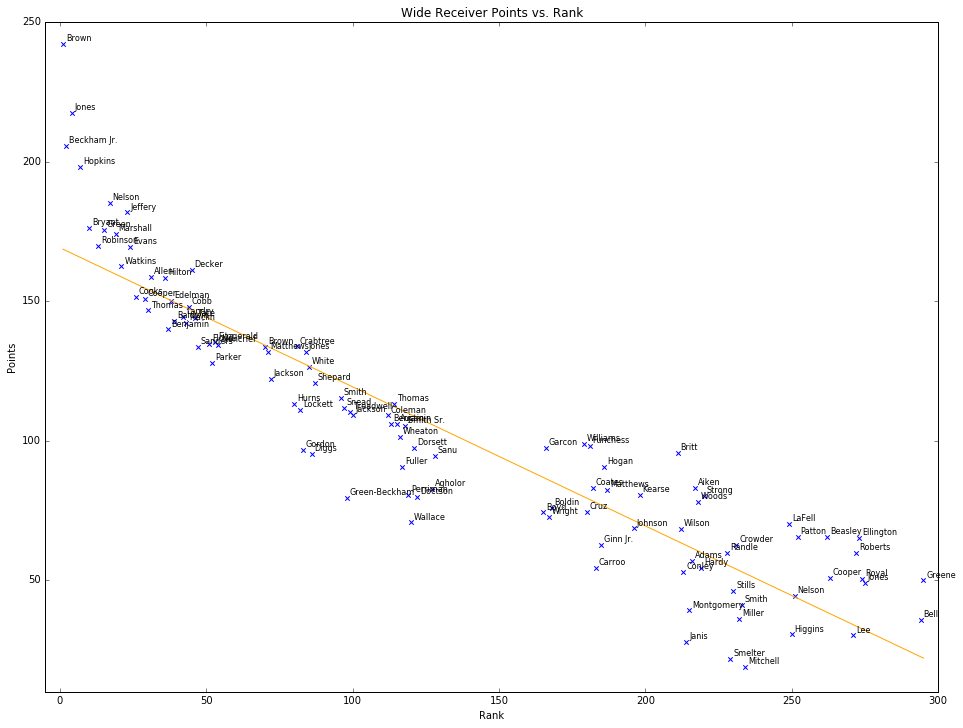

In [60]:
# wr graph
wr_fig = plt.figure(figsize=(16, 12))
wr_ax = wr_fig.add_subplot("111")

wr_ax.set_title("Wide Receiver Points vs. Rank")
wr_ax.set_ylabel("Points")
wr_ax.set_xlabel("Rank")
wr_ax.set_ylim(10,250)
wr_ax.set_xlim(-5,300)

wr_ax.scatter(wr_data["Rank"], wr_data["PTS"], marker = "x", c = colors["WR"])

wr_ax.plot(wr_data["Rank"], np.poly1d(np.polyfit(wr_data["Rank"], wr_data["PTS"], 1))(wr_data["Rank"]), c = "orange")

for index, name in enumerate(wr_data["Name"]):
    #data point
    rank = wr_data["Rank"].iloc[index]
    pts = wr_data["PTS"].iloc[index]
    
    #get last name of player
    name = last_names[rank-1]
    
    #add label to the data point
    wr_ax.text(rank+1,pts+1, name, fontsize=8)

plt.show()

In [50]:
# Filter TE's
te_data = data[data["Position"] == "TE"]

te_data = te_data.drop(["Position", "C", "A", "PASSTD"], 1)

#rb averages 
te_data.describe()

,Rank,RUSH,RUSHYDS,RUSHTD,REC,RECYDS,RECTD,PASSYDS,INT,PTS
count,34.000000,34.0,34.0,34.0,34.000000,34.000000,34.000000,34.0,34.0,34.000000
mean,178.529412,0.0,0.0,0.0,52.967647,602.455882,4.717647,0.0,0.0,87.867647
std,84.748553,0.0,0.0,0.0,17.109340,220.825593,1.774477,0.0,0.0,31.903222
min,11.000000,0.0,0.0,0.0,22.600000,227.500000,2.200000,0.0,0.0,36.900000
25%,110.250000,0.0,0.0,0.0,38.525000,451.375000,3.175000,0.0,0.0,60.625000
50%,181.500000,0.0,0.0,0.0,51.900000,591.400000,4.600000,0.0,0.0,86.000000
75%,257.750000,0.0,0.0,0.0,63.375000,753.175000,5.675000,0.0,0.0,107.825000
max,293.000000,0.0,0.0,0.0,89.100000,1124.600000,9.700000,0.0,0.0,170.900000


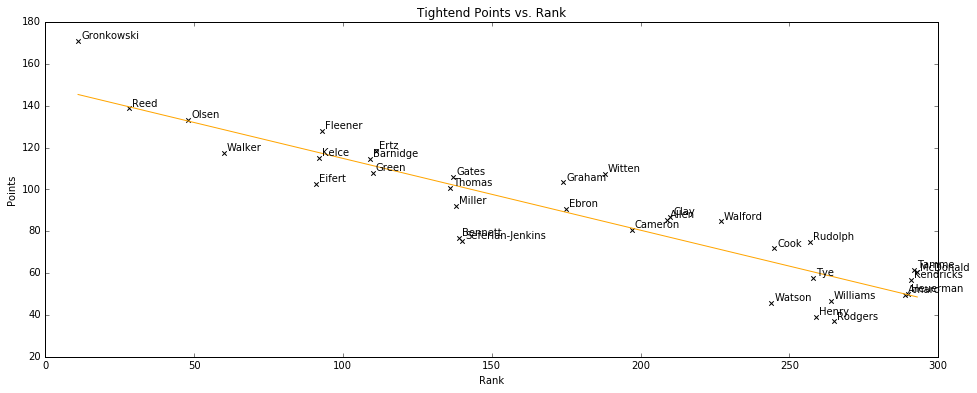

In [55]:
# te graph
te_fig = plt.figure(figsize=(16, 6))
te_ax = te_fig.add_subplot("111")

te_ax.set_title("Tightend Points vs. Rank")
te_ax.set_ylabel("Points")
te_ax.set_xlabel("Rank")
te_ax.set_xlim(0,300)

te_ax.scatter(te_data["Rank"], te_data["PTS"], marker = "x", c = colors["TE"])

te_ax.plot(te_data["Rank"], np.poly1d(np.polyfit(te_data["Rank"], te_data["PTS"], 1))(te_data["Rank"]), c = "orange")

for index, name in enumerate(te_data["Name"]):
    #data point
    rank = te_data["Rank"].iloc[index]
    pts = te_data["PTS"].iloc[index]
    
    #get last name of player
    name = last_names[rank-1]
    
    #add label to the data point
    te_ax.text(rank+1,pts+1, name, fontsize=10)

plt.show()

In [18]:
# Filter Flex

In [19]:
# Filter K's

In [ ]:
# Filter D/ST's